In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle
import time 

In [2]:
# log = pm4py.read_xes('./BPI_Challenge_2012.xes.gz')
# df = pm4py.convert_to_dataframe(log)
# 244190*0.3

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/NickSot/process_mining/main/BPI_2012.csv')
starttime = time.time()
print('DataFrame size: {}'.format(len(df)))
print('DataFrame without nulls size: {}'.format(len(df.dropna())))
df.rename(columns = {'event': 'concept:name', 'case':'case:concept:name'},  inplace=True)
df.iloc[:10]

DataFrame size: 190827
DataFrame without nulls size: 190827


,case:concept:name,concept:name,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862
6,173688,O_SELECTED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
7,173688,A_FINALIZED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
8,173688,O_CREATED,2011/10/01 11:45:11.197,2011/10/01 11:45:11.197,20000,2011/10/01 00:38:44.546,10862
9,173688,O_SENT,2011/10/01 11:45:11.380,2011/10/01 11:45:11.380,20000,2011/10/01 00:38:44.546,10862


In [4]:
df.dropna(inplace=True)
df.describe()

,case:concept:name,AMOUNT_REQ,org:resource
count,190827.000000,190827.000000,190827.000000
mean,193851.453673,15438.929088,8271.081299
std,11688.517781,12315.133412,4700.713383
min,173688.000000,0.000000,112.000000
25%,183292.000000,6000.000000,10138.000000
50%,194242.000000,10500.000000,10913.000000
75%,203850.000000,20000.000000,11121.000000
max,214376.000000,99999.000000,11339.000000


In [5]:
#test train split on date
slices = int(len(df)*0.3)
print(slices)
dftrain = df.iloc[:slices]
dftest = df.iloc[slices:]

57248


In [6]:
dftraing = dftrain.groupby(by='concept:name')
#dftraing.describe()['org:resource']['count'] / sum(dftraing.describe()['org:resource']['count']) * 100

In [7]:
eventlist = list(dftraing.describe()['org:resource'].index)
eventlist

['A_ACCEPTED',
 'A_ACTIVATED',
 'A_APPROVED',
 'A_CANCELLED',
 'A_DECLINED',
 'A_FINALIZED',
 'A_PARTLYSUBMITTED',
 'A_PREACCEPTED',
 'A_REGISTERED',
 'A_SUBMITTED',
 'O_ACCEPTED',
 'O_CANCELLED',
 'O_CREATED',
 'O_DECLINED',
 'O_SELECTED',
 'O_SENT',
 'O_SENT_BACK',
 'W_Afhandelen leads',
 'W_Beoordelen fraude',
 'W_Completeren aanvraag',
 'W_Nabellen incomplete dossiers',
 'W_Nabellen offertes',
 'W_Valideren aanvraag']

In [8]:
# case = 'blib'
# first_item = []
# for index, row in df.iterrows():
#     if case != row['case:concept:name']:
#         case = row['case:concept:name']
#         task = row['concept:name']
#         first_item.append(task)
# print(Counter(first_item))

In [9]:
# Counter(first_item)

In [10]:

def nth_most_common(w, n):
    sort = dict(sorted(Counter(w).items(), key=lambda item: item[1]))
    return str(list(sort)[-n])

In [11]:
def get_max(df, task):
    previous = 'blibs'
    empty = []
    case = 'blib'
    for index, row in df.iterrows():
        t = row['concept:name']
        c = row['case:concept:name']
        if (case == c) & (previous == task):
            empty.append(t)
        case = c
        previous = t
    return nth_most_common(empty, 1)


In [12]:
#get_max('A_ACCEPTED')

In [13]:
caselist = list(df['concept:name'].unique())

In [14]:
next_common_train = {}
for value in caselist:
    next_common_train[value] = get_max(task=value, df=dftrain)

In [15]:

next_common_train

{'A_SUBMITTED': 'A_PARTLYSUBMITTED',
 'A_PARTLYSUBMITTED': 'A_PREACCEPTED',
 'A_PREACCEPTED': 'W_Completeren aanvraag',
 'W_Completeren aanvraag': 'W_Completeren aanvraag',
 'A_ACCEPTED': 'O_SELECTED',
 'O_SELECTED': 'A_FINALIZED',
 'A_FINALIZED': 'O_CREATED',
 'O_CREATED': 'O_SENT',
 'O_SENT': 'O_SENT',
 'W_Nabellen offertes': 'W_Nabellen offertes',
 'O_SENT_BACK': 'O_SENT_BACK',
 'W_Valideren aanvraag': 'W_Valideren aanvraag',
 'A_REGISTERED': 'A_ACTIVATED',
 'A_APPROVED': 'A_ACTIVATED',
 'O_ACCEPTED': 'A_REGISTERED',
 'A_ACTIVATED': 'A_REGISTERED',
 'O_CANCELLED': 'O_CREATED',
 'A_DECLINED': 'O_DECLINED',
 'A_CANCELLED': 'O_CANCELLED',
 'W_Afhandelen leads': 'A_PREACCEPTED',
 'O_DECLINED': 'A_DECLINED',
 'W_Nabellen incomplete dossiers': 'W_Nabellen incomplete dossiers',
 'W_Beoordelen fraude': 'W_Beoordelen fraude'}

In [16]:
a=[["A_SUBMITTED", "0 days 00:00:00.581691655"],["A_PARTLYSUBMITTED", "0 days 01:01:20.356231880"],["A_PREACCEPTED", "0 days 02:04:54.228496869"],
["W_Completeren aanvraag","0 days 08:40:17.229487175"],["A_ACCEPTED","0 days 08:00:42.411919642"],["O_SELECTED","0 days 07:12:11.466512821"],
["A_FINALIZED","0 days 06:43:09.900357195"],['O_CREATED', '0 days 06:08:28.321527951'],["O_SENT", "0 days 10:40:10.900425471"],
["W_Nabellen offertes","0 days 18:40:50.682267246"],["O_SENT_BACK","0 days 19:40:24.803281383"],["W_Valideren aanvraag", "0 days 18:40:09.228862896"],
["A_REGISTERED","0 days 16:10:59.567745959"],["A_APPROVED","0 days 15:00:13.220079862"],["O_ACCEPTED","0 days 13:58:37.092804743"],
["A_ACTIVATED", "0 days 10:37:04.191335731"],["O_CANCELLED", "0 days 07:06:06.679006013"],["A_DECLINED","0 days 05:10:39.946601047"],
["A_CANCELLED", "0 days 00:01:54.501236994"],["W_Afhandelen leads", "0 days 00:03:03.999699108"],["O_DECLINED", "-1 days +23:03:35.456204528"],
["W_Nabellen incomplete dossiers", "0 days 00:00:37.705275266"],["W_Beoordelen fraude", "0 days 00:01:20.024146315"]]

In [17]:
d = {}
for value in a:
    d[value[0]] = value[1]

d

{'A_SUBMITTED': '0 days 00:00:00.581691655',
 'A_PARTLYSUBMITTED': '0 days 01:01:20.356231880',
 'A_PREACCEPTED': '0 days 02:04:54.228496869',
 'W_Completeren aanvraag': '0 days 08:40:17.229487175',
 'A_ACCEPTED': '0 days 08:00:42.411919642',
 'O_SELECTED': '0 days 07:12:11.466512821',
 'A_FINALIZED': '0 days 06:43:09.900357195',
 'O_CREATED': '0 days 06:08:28.321527951',
 'O_SENT': '0 days 10:40:10.900425471',
 'W_Nabellen offertes': '0 days 18:40:50.682267246',
 'O_SENT_BACK': '0 days 19:40:24.803281383',
 'W_Valideren aanvraag': '0 days 18:40:09.228862896',
 'A_REGISTERED': '0 days 16:10:59.567745959',
 'A_APPROVED': '0 days 15:00:13.220079862',
 'O_ACCEPTED': '0 days 13:58:37.092804743',
 'A_ACTIVATED': '0 days 10:37:04.191335731',
 'O_CANCELLED': '0 days 07:06:06.679006013',
 'A_DECLINED': '0 days 05:10:39.946601047',
 'A_CANCELLED': '0 days 00:01:54.501236994',
 'W_Afhandelen leads': '0 days 00:03:03.999699108',
 'O_DECLINED': '-1 days +23:03:35.456204528',
 'W_Nabellen incomplet

In [18]:
df = dftest
df['predicted_next_event'] = df['concept:name'].map(next_common_train)

In [19]:
df['time_until_next'] = df['concept:name'].map(d)
df.to_csv('2012_+predictions.csv')
df.iloc[:10]

,case:concept:name,concept:name,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,predicted_next_event,time_until_next
57248,185569,W_Completeren aanvraag,2011/11/16 10:45:05.126,2011/11/16 10:45:37.329,5500,2011/11/15 14:00:07.304,10863,W_Completeren aanvraag,0 days 08:40:17.229487175
57249,185569,W_Completeren aanvraag,2011/11/16 17:10:28.861,2011/11/16 17:12:31.229,5500,2011/11/15 14:00:07.304,10861,W_Completeren aanvraag,0 days 08:40:17.229487175
57250,185569,W_Completeren aanvraag,2011/11/16 17:15:53.917,2011/11/16 17:16:04.166,5500,2011/11/15 14:00:07.304,10861,W_Completeren aanvraag,0 days 08:40:17.229487175
57251,185569,W_Completeren aanvraag,2011/11/17 19:08:40.208,2011/11/17 19:09:06.001,5500,2011/11/15 14:00:07.304,11180,W_Completeren aanvraag,0 days 08:40:17.229487175
57252,185569,W_Completeren aanvraag,2011/11/18 19:33:42.674,2011/11/18 19:34:46.701,5500,2011/11/15 14:00:07.304,11201,W_Completeren aanvraag,0 days 08:40:17.229487175
57253,185569,W_Completeren aanvraag,2011/11/19 12:05:36.877,2011/11/19 12:07:16.363,5500,2011/11/15 14:00:07.304,10861,W_Completeren aanvraag,0 days 08:40:17.229487175
57254,185569,W_Completeren aanvraag,2011/12/16 09:15:07.347,2011/12/16 09:15:07.347,5500,2011/11/15 14:00:07.304,10861,W_Completeren aanvraag,0 days 08:40:17.229487175
57255,185569,A_CANCELLED,2011/12/16 09:15:07.349,2011/12/16 09:15:07.349,5500,2011/11/15 14:00:07.304,112,O_CANCELLED,0 days 00:01:54.501236994
57256,185572,A_SUBMITTED,2011/11/15 14:02:34.623,2011/11/15 14:02:34.623,7000,2011/11/15 14:02:34.623,112,A_PARTLYSUBMITTED,0 days 00:00:00.581691655
57257,185572,A_PARTLYSUBMITTED,2011/11/15 14:02:34.987,2011/11/15 14:02:34.987,7000,2011/11/15 14:02:34.623,112,A_PREACCEPTED,0 days 01:01:20.356231880


In [20]:

#df.iloc[-100:]

In [21]:
#set actual next case in dataframe and remove predictions on non same cases
df['next_event'] = df['concept:name'].shift(-1)
df['next_case'] = df['case:concept:name'].shift(-1)

#df2 = df.drop(df[df['case:concept:name'] != df['next_case']].index)

In [22]:
df2 = df
df2.iloc[30:50]

,case:concept:name,concept:name,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,predicted_next_event,time_until_next,next_event,next_case
57278,185584,O_SELECTED,2011/11/15 15:18:10.019,2011/11/15 15:18:10.019,13250,2011/11/15 14:27:35.517,11189,A_FINALIZED,0 days 07:12:11.466512821,O_CREATED,185584.0
57279,185584,O_CREATED,2011/11/15 15:18:11.357,2011/11/15 15:18:11.357,13250,2011/11/15 14:27:35.517,11189,O_SENT,0 days 06:08:28.321527951,O_SENT,185584.0
57280,185584,O_SENT,2011/11/15 15:18:11.406,2011/11/15 15:18:11.406,13250,2011/11/15 14:27:35.517,11189,O_SENT,0 days 10:40:10.900425471,O_SENT,185584.0
57281,185584,O_SENT,2011/11/15 15:18:11.406,2011/11/15 15:18:11.406,13250,2011/11/15 14:27:35.517,11189,O_SENT,0 days 10:40:10.900425471,W_Nabellen offertes,185584.0
57282,185584,W_Nabellen offertes,2011/11/21 20:22:29.946,2011/11/21 20:25:13.999,13250,2011/11/15 14:27:35.517,11189,W_Nabellen offertes,0 days 18:40:50.682267246,W_Nabellen offertes,185584.0
57283,185584,W_Nabellen offertes,2011/11/22 20:21:42.210,2011/11/22 20:23:05.268,13250,2011/11/15 14:27:35.517,11181,W_Nabellen offertes,0 days 18:40:50.682267246,W_Nabellen offertes,185584.0
57284,185584,W_Nabellen offertes,2011/11/25 18:59:28.685,2011/11/25 19:00:26.132,13250,2011/11/15 14:27:35.517,11201,W_Nabellen offertes,0 days 18:40:50.682267246,W_Nabellen offertes,185584.0
57285,185584,W_Nabellen offertes,2011/11/28 15:38:29.519,2011/11/28 15:40:08.303,13250,2011/11/15 14:27:35.517,11201,W_Nabellen offertes,0 days 18:40:50.682267246,O_CANCELLED,185584.0
57286,185584,O_CANCELLED,2011/11/28 15:40:05.617,2011/11/28 15:40:05.617,13250,2011/11/15 14:27:35.517,10971,O_CREATED,0 days 07:06:06.679006013,A_CANCELLED,185584.0
57287,185584,A_CANCELLED,2011/11/28 15:40:05.617,2011/11/28 15:40:05.617,13250,2011/11/15 14:27:35.517,10971,O_CANCELLED,0 days 00:01:54.501236994,A_SUBMITTED,185587.0


In [23]:
same=0
diff = 0
for value, row in df2.iterrows():
    if row['next_case'] == row['case:concept:name']: 
        if row['predicted_next_event'] == row['next_event']:
            same += 1
        else: diff += 1

In [24]:
same

75228

In [25]:
diff

49074

In [26]:
accuracy = same / (diff+same) *100

In [27]:
accuracy

60.52034560988561

In [28]:
numbers = {}
i = 0
for value in eventlist[1:]:
    numbers[value] = i
    i +=1 
numbers

{'A_ACTIVATED': 0,
 'A_APPROVED': 1,
 'A_CANCELLED': 2,
 'A_DECLINED': 3,
 'A_FINALIZED': 4,
 'A_PARTLYSUBMITTED': 5,
 'A_PREACCEPTED': 6,
 'A_REGISTERED': 7,
 'A_SUBMITTED': 8,
 'O_ACCEPTED': 9,
 'O_CANCELLED': 10,
 'O_CREATED': 11,
 'O_DECLINED': 12,
 'O_SELECTED': 13,
 'O_SENT': 14,
 'O_SENT_BACK': 15,
 'W_Afhandelen leads': 16,
 'W_Beoordelen fraude': 17,
 'W_Completeren aanvraag': 18,
 'W_Nabellen incomplete dossiers': 19,
 'W_Nabellen offertes': 20,
 'W_Valideren aanvraag': 21}

In [29]:
df2.iloc[30:50]
df2.dropna(inplace=True)
df2.iloc[30:50]
labelsd = df2['next_event'].unique()

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# df.dropna(inplace=True)
# cf_matrix = confusion_matrix(df2['next_event'], df2['predicted_next_event'], labels=labelsd)
# fig, ax = plt.subplots(figsize=(20,17)) 
# sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)

In [31]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# y_test = df2['next_event']
# y_pred = df2['predicted_next_event']
# labels = np.unique(y_test)
# cm = confusion_matrix(y_test, y_pred, labels=labels)
# # Normalise
# cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# fig, ax = plt.subplots(figsize=(20,15))
# sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', ax=ax)
# plt.xlabel('Predicted')
# plt.ylabel('actual')
# plt.show(block=False)

In [32]:
#df.groupby('next_event').describe()

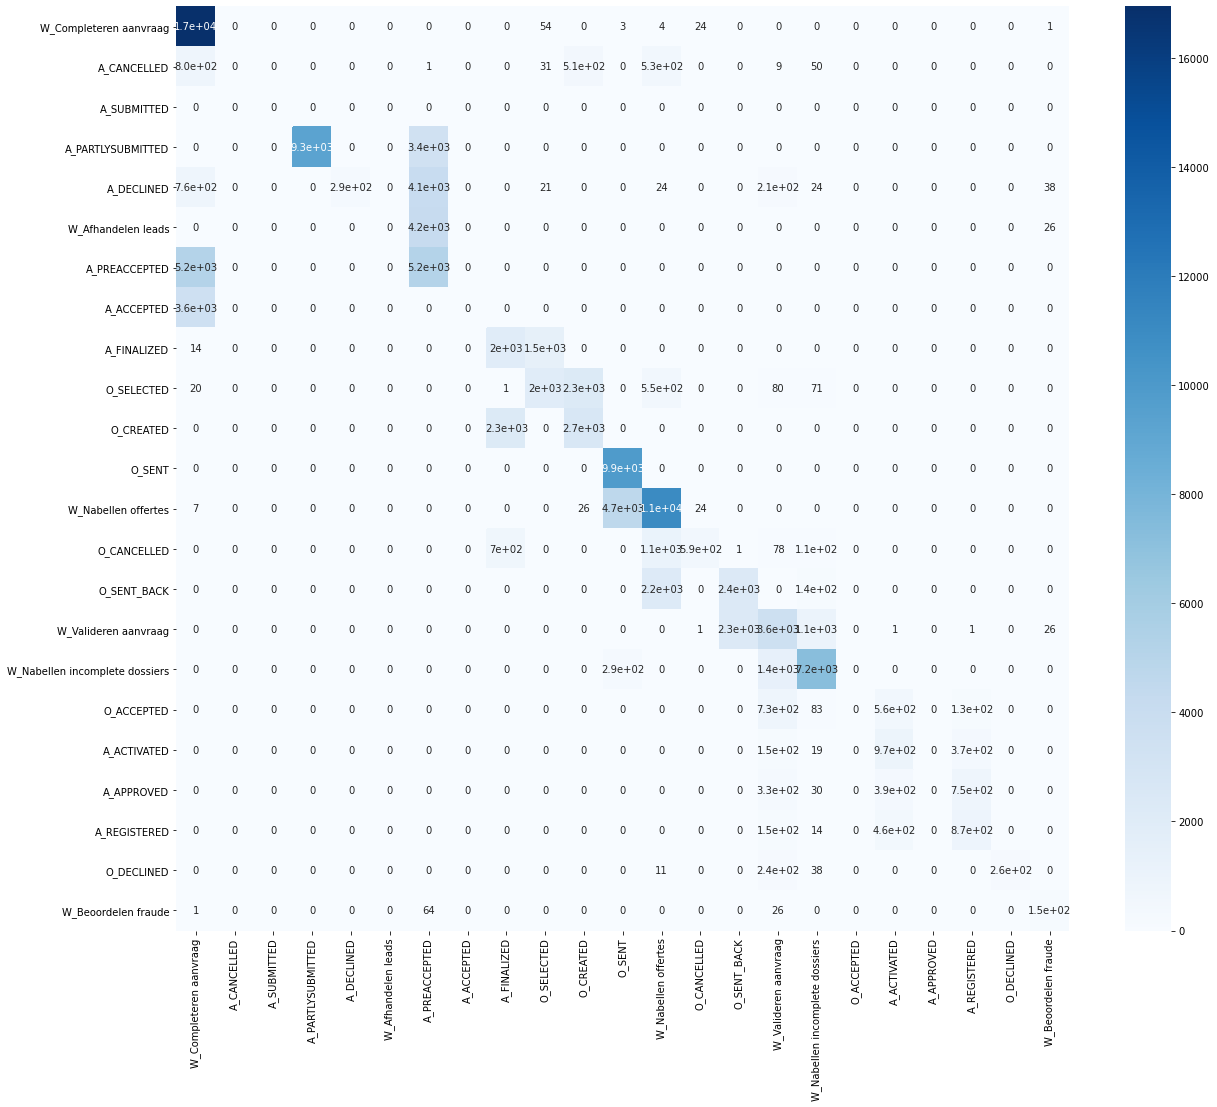

In [33]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
y_test = df2[df2['next_case'] == df['case:concept:name']]['next_event']
y_pred = df2[df2['next_case'] == df['case:concept:name']]['predicted_next_event']
labels = list(labelsd)
a =  confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(20,17)) 
cmd = pd.DataFrame(a, index=labels, columns=labels)
sns.heatmap(cmd, annot=True, cmap='Blues', ax=ax)
fig.savefig('confusionmatrix.png')


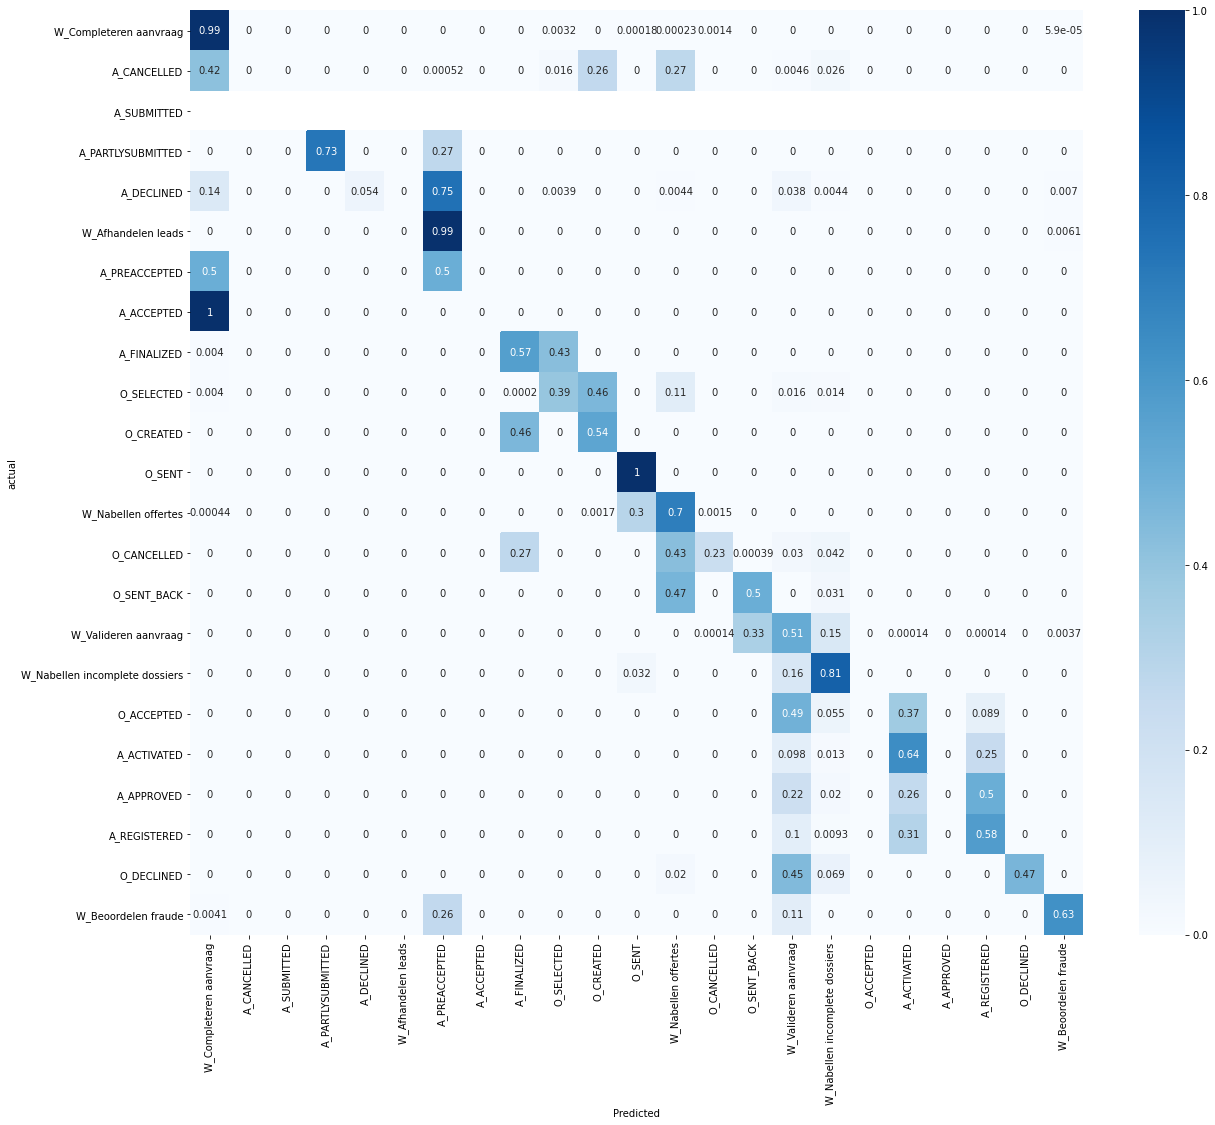

In [34]:
cmdn = cmd.div(cmd.sum(axis=1), axis=0)
cmdn
fig, ax = plt.subplots(figsize=(20,17)) 
sns.heatmap(cmdn, annot=True, cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('actual')
fig.savefig('norm_confusion_matrix.png', dpi=300)

In [35]:
endtime = time.time()
totaltime = endtime - starttime
print(totaltime)

67.9759476184845
